In [231]:
import pandas as pd
import seaborn as sns

In [233]:
data = pd.read_excel('Direct Speed vs Pressing Sequence Data in English Football.xlsx')

In [235]:
data.head

<bound method NDFrame.head of             Team  Pressed Sequences  Direct Speed          League
0        Walsall              13.05          2.20      League Two
1      Wimbledon              13.17          1.99      League Two
2        Grimsby              12.05          2.12      League Two
3      Port Vale              11.55          2.08      League Two
4        Swindon              10.88          1.72      League Two
..           ...                ...           ...             ...
87     Leicester              10.06          1.65  Premier League
88        Fulham               9.81          1.74  Premier League
89   Southampton               9.19          1.46  Premier League
90  Nottm Forest              10.34          2.07  Premier League
91       Ipswich               9.47          1.79  Premier League

[92 rows x 4 columns]>

In [237]:
X = data[['Pressed Sequences']]

In [239]:
Y = data['Direct Speed']

In [241]:
from sklearn.linear_model import LinearRegression

In [243]:
reg = LinearRegression()

In [245]:
reg.fit(X,Y)

LinearRegression()

In [247]:
predictions = reg.predict(X)

In [249]:
import matplotlib.pyplot as plt

C:\Users\jbinn\AppData\Local\Temp\ipykernel_22336\2245865197.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


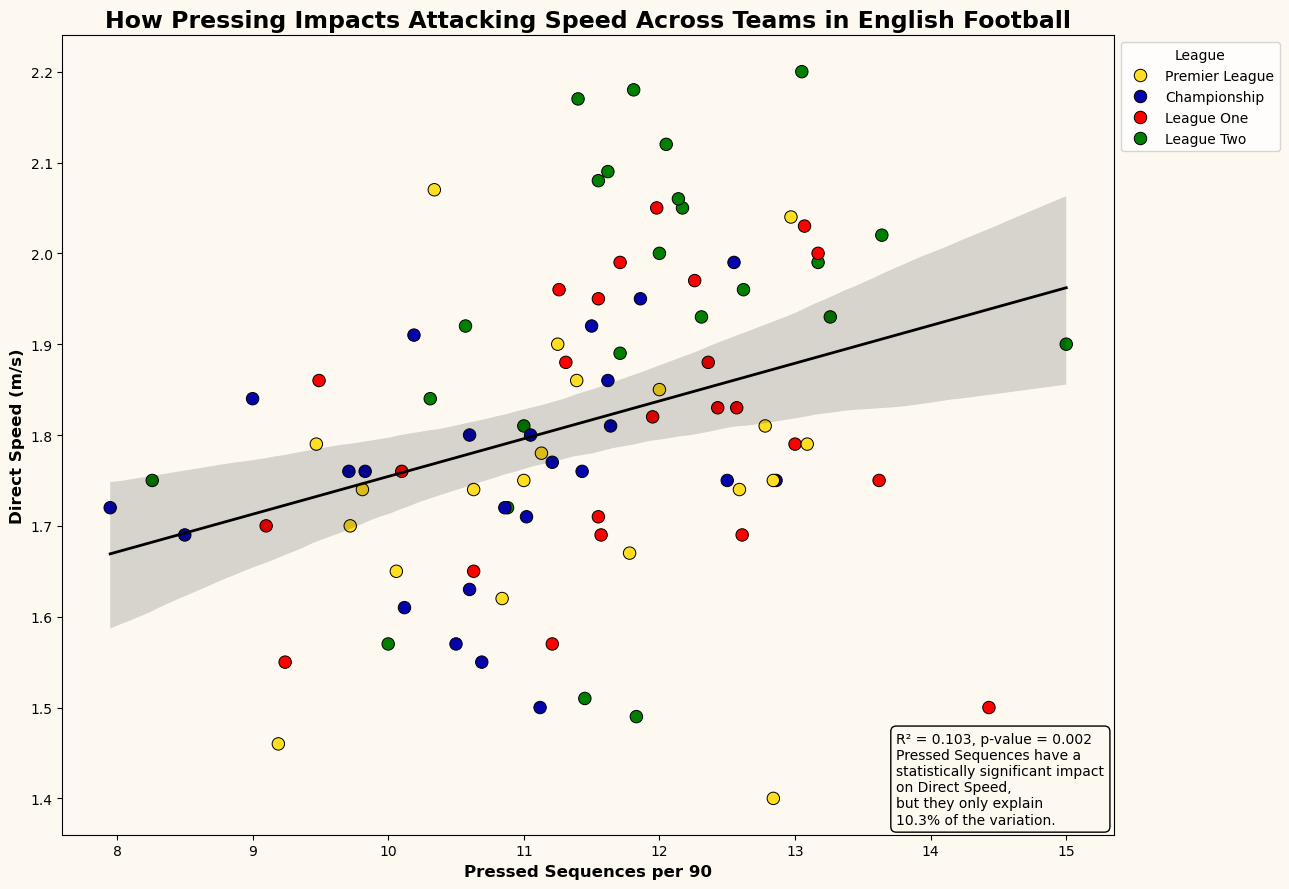

In [251]:
league_palette = {
    'Premier League': '#FFDE21',
    'Championship': '#0504AA',   
    'League One': '#FF0000',     
    'League Two': '#008000'       
}

league_order = ['Premier League', 'Championship', 'League One', 'League Two']

fig, ax = plt.subplots(figsize=(13, 9), constrained_layout=True)
fig.patch.set_facecolor('#fdf9f1')  
ax.set_facecolor('#fdf9f1')      

sns.scatterplot(
    x='Pressed Sequences',
    y='Direct Speed',
    hue='League',
    data=data,
    palette=league_palette,
    s=80,
    edgecolor='black',
    ax=ax,
    hue_order=league_order 
)

sns.regplot(
    x='Pressed Sequences',
    y='Direct Speed',
    data=data,
    scatter=False,
    ci=95,  
    line_kws={'color': 'black', 'linewidth': 2},
    ax=ax
)

plt.xlabel('Pressed Sequences per 90', fontsize=12, fontweight='bold')
plt.ylabel('Direct Speed (m/s)', fontsize=12, fontweight='bold')
plt.title('How Pressing Impacts Attacking Speed Across Teams in English Football', fontsize=17, fontweight='bold')

plt.legend(title='League', bbox_to_anchor=(1, 1), loc='upper left')

info_text = (
    f"R² = {r2:.3f}, p-value = {p_val:.3f}\n"
    "Pressed Sequences have a\n"
    "statistically significant impact\n" 
    "on Direct Speed,\n"
    "but they only explain\n"
    "10.3% of the variation."
)

plt.text(
    0.793, 0.129, 
    info_text,
    transform=ax.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(facecolor='#fdf9f1', edgecolor='black', boxstyle='round,pad=0.4')
)

plt.tight_layout()
plt.show()

In [252]:
r_squared = reg.score(X,Y)

In [253]:
print(r_squared)

0.10307157044269044


In [254]:
import statsmodels.api as sm
x_const = sm.add_constant(X)
ols_model = sm.OLS(Y, x_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:           Direct Speed   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     10.34
Date:                Thu, 17 Apr 2025   Prob (F-statistic):            0.00181
Time:                        11:55:13   Log-Likelihood:                 35.656
No. Observations:                  92   AIC:                            -67.31
Df Residuals:                      90   BIC:                            -62.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3389      0.14